# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
BASE_URL = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URl
BASE_URL = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{BASE_URL}&q={city.replace(' ', '+')}"
 
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # pause for 1 second using time.sleep()
        time.sleep(1)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | chamical
Processing Record 3 of Set 1 | borodino
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | severodvinsk
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | ola
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | onega
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | huayucachi
Processing Record 15 of Set 1 | bechar
Processing Record 16 of Set 1 | shitanjing
Processing Record 17 of Set 1 | tazovsky
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | beatrice
Processing Record 20 of Set 1 | north bend
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | mount gambier
Processing Record 23 of

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,34.70,83,100,4.76,SJ,1701217555
1,chamical,-30.3600,-66.3140,87.84,40,11,21.25,AR,1701217556
2,borodino,55.9106,94.8983,-13.85,99,39,1.12,RU,1701217558
3,port-aux-francais,-49.3500,70.2167,41.83,98,100,22.15,TF,1701217560
4,albany,42.6001,-73.9662,28.51,73,54,5.99,US,1701217561


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,34.70,83,100,4.76,SJ,1701217555
1,chamical,-30.3600,-66.3140,87.84,40,11,21.25,AR,1701217556
2,borodino,55.9106,94.8983,-13.85,99,39,1.12,RU,1701217558
3,port-aux-francais,-49.3500,70.2167,41.83,98,100,22.15,TF,1701217560
4,albany,42.6001,-73.9662,28.51,73,54,5.99,US,1701217561


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

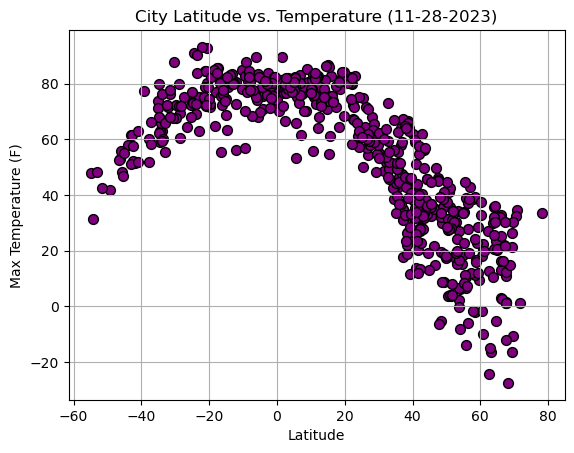

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color = "purple",
    edgecolor = "black",
    linewidth = 1,
    marker = "o",
    label = "Cities",
    s = 50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

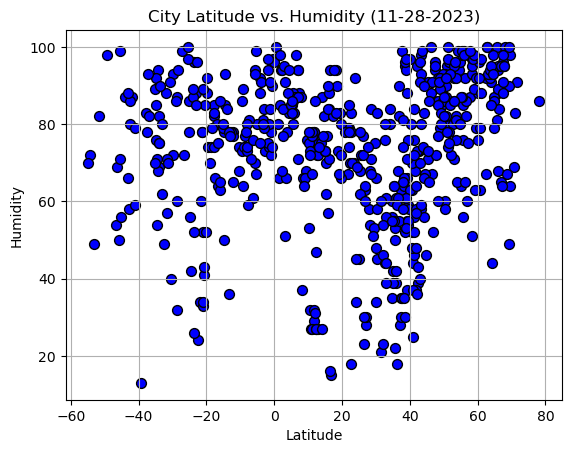

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color = "blue",
    edgecolor = "black",
    linewidth = 1,
    marker = "o",
    label = "Cities",
    s = 50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

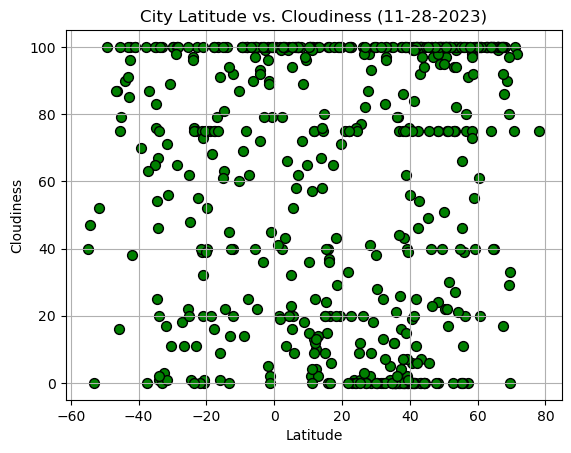

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color = "green",
    edgecolor = "black",
    linewidth = 1,
    marker = "o",
    label = "Cities",
    s = 50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

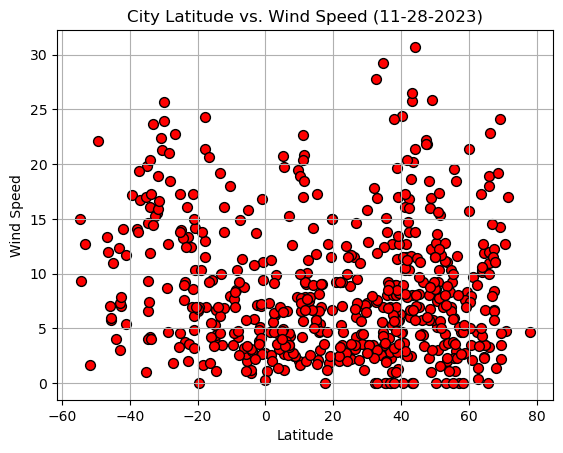

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    color = "red",
    edgecolor = "black",
    linewidth = 1,
    marker = "o",
    label = "Cities",
    s = 50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):

    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values, y_values, color = color, edgecolor = "black", s = 50)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "blue")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,34.70,83,100,4.76,SJ,1701217555
2,borodino,55.9106,94.8983,-13.85,99,39,1.12,RU,1701217558
4,albany,42.6001,-73.9662,28.51,73,54,5.99,US,1701217561
5,bethel,41.3712,-73.4140,32.20,56,0,12.66,US,1701217563
6,severodvinsk,64.5635,39.8302,21.13,94,100,11.88,RU,1701217565


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,chamical,-30.3600,-66.3140,87.84,40,11,21.25,AR,1701217556
3,port-aux-francais,-49.3500,70.2167,41.83,98,100,22.15,TF,1701217560
9,waitangi,-43.9535,-176.5597,57.81,87,90,4.00,NZ,1701217570
11,blackmans bay,-43.0167,147.3167,61.52,66,91,3.00,AU,1701217573
13,huayucachi,-12.1333,-75.2333,55.99,78,92,6.82,PE,1701217576


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7484202406634223


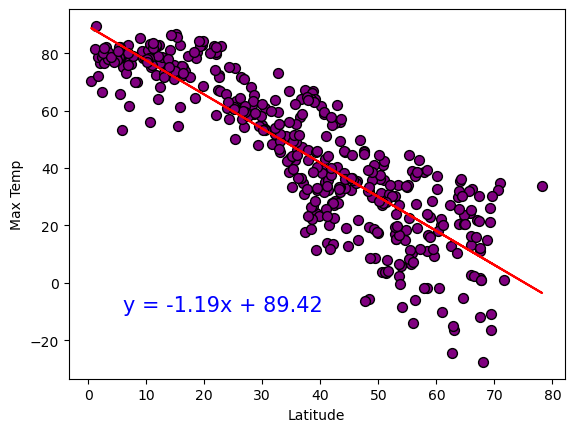

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6, -10), "purple")

The r-value is: 0.46307203625987575


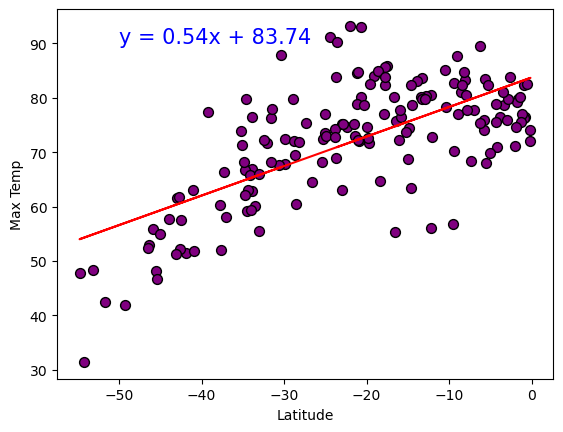

In [38]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-50,90), "purple")

**Discussion about the linear relationship:** There is a strong correlation between Temp and Latitude in the Northern Hemisphere. The Southern Hemisphere has a weak correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06426674027421374


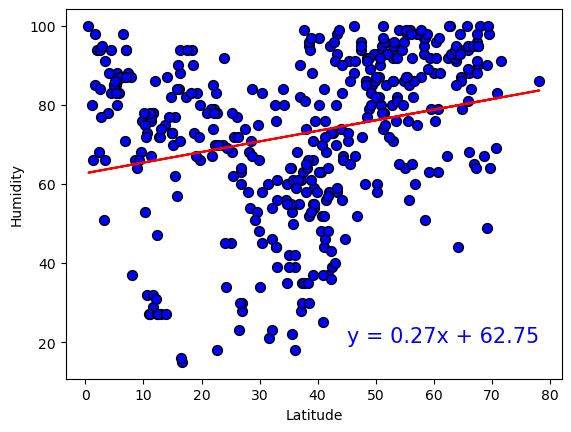

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (45,20), "blue")

The r-value is: 0.02386284829522212


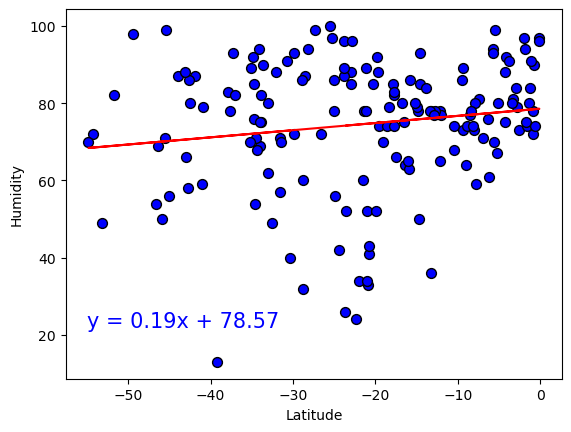

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-55,22), "blue")

**Discussion about the linear relationship:** Both in the Northern and Southern there is virtually no correlation between Latitude and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04600191766861369


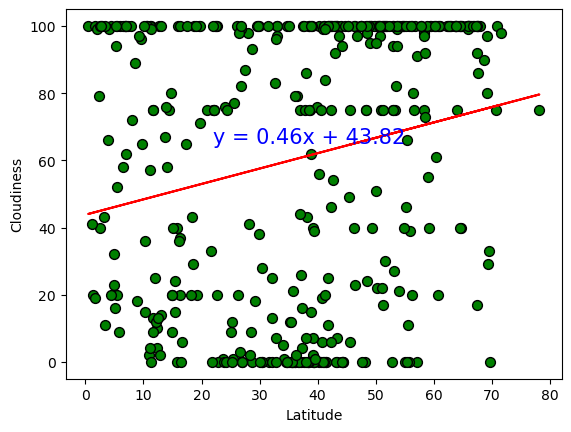

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (22,65), "green")

The r-value is: 0.010797417775016943


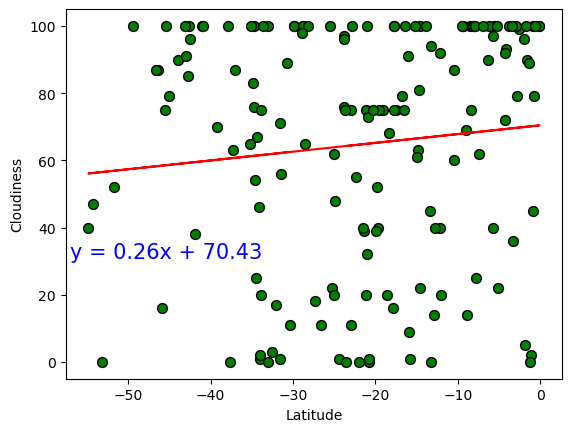

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-57,31), "green")

**Discussion about the linear relationship:** Again, there is virtualy no correlation between Latitude and Cloudiness in both the Northern and Southern Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.008700902132379708


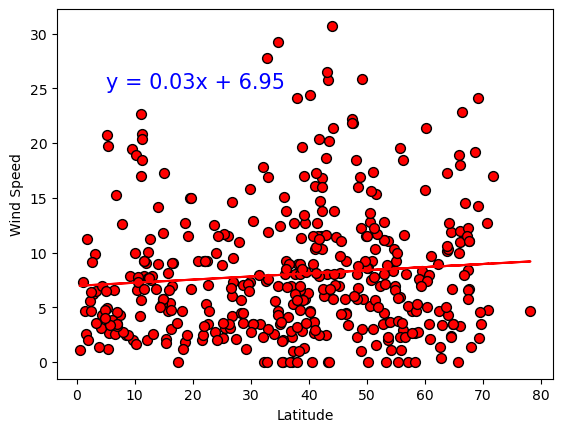

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (5,25), "red")

The r-value is: 0.11018289824822441


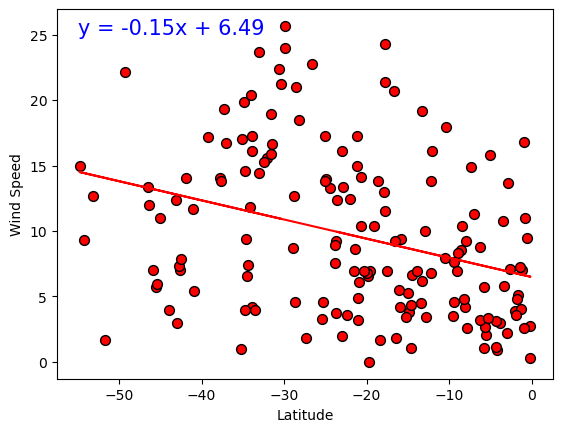

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-55,25), "red")

**Discussion about the linear relationship:** In the Northern Hemisphere there is no correlation between Latitude and Wind Speed. In the Southern Hemisphere there is a very weak correlation.